In [2]:
import matplotlib.pyplot as plt
import pandas 
import math
import numpy as np
import random
from numpy import linalg
from numpy import matrix
import time
%matplotlib inline

In [3]:
start_time = time.time()
regret_info = {}
data = open('data10', 'r')
for line in data:
    splitted = line.split('|')
    user = splitted[1]
    features = splitted[0].split(' ')
    article = int(features[1])
    click = int(features[2])
    user_article = article #(user, article)
    if user_article in regret_info:
        show_info = regret_info[user_article]
        show_info[0] = show_info[0] + 1
        show_info[1] = show_info[1] + click
        regret_info[user_article] = show_info
    else:
        regret_info[user_article] = [1, click]
data.close()
print("--- %s seconds ---" % (time.time() - start_time))

--- 24.4540719986 seconds ---


Compute the 

In [4]:
for elem in regret_info.keys():
    array = regret_info[elem]
    regret_info[elem] = float(array[1])/float(array[0])

In [4]:
len(regret_info)

39

Creating hahs tables: article -> martix for article A, article -> vector for article b and 
article -> payoff estimate p.

LinUCB algorithm!

In [14]:
alpha = 0.15
max_regret = max(regret_info.values())
print max_regret

0.077441869584


In [1]:
start_time = time.time()
data = open('data10')
user_articles = [''] * 20
article_features = {}
payoff_for_user = [0.] * 20
regret = [0.] * 20
distance = []
matrix_A = {}
inversed_matrix_A = {}
vector_b = {}
payoff = {}
tetas = {}


profile = [0] * 10
import tqdm
def extract_features(features_string):
    return np.matrix(map(lambda x: float(x.split(':')[1]), features_string.split(' ')[1:6]))

try:
    for line in tqdm.tqdm(data):
        splitted = line.split('|')
        user = splitted[1]
        st = time.clock()
        profile[0] += st - time.clock()  
        for i in xrange(20):
            st = time.clock()
            article = int(splitted[i + 2].split(' ')[0])
            user_articles[i] = article #(user, article)

            if article not in article_features:
                article_features[article] = extract_features(splitted[i + 2])
            
            if user_articles[i] not in matrix_A:
                matrix_A[user_articles[i]] = np.matrix(np.identity(5))
                inversed_matrix_A[user_articles[i]] = np.matrix(np.identity(5))
                vector_b[user_articles[i]] = np.matrix(np.zeros(5))
                tetas[user_articles[i]] = np.matrix(np.zeros(5)).T
                
           
            
            inverse_matrix = inversed_matrix_A[article] #np.ndarray
            
            
            teta = tetas[article]
            features = np.array(features)

            ar_features =  article_features[article]
           
            payoff[user_articles[i]] = teta.T * ar_features.T  + alpha * math.sqrt(ar_features * inverse_matrix  * ar_features.T)
            payoff_for_user[i] = (float(payoff[user_articles[i]]))
            regret[i] = regret_info[user_articles[i]]
           
        profile[1] += st - time.clock()
        st = time.clock()
        #break
        max_payoff = np.amax(payoff_for_user)
        max_regret = np.amax(regret)
        distance.append(abs(max_regret - max_payoff))
        winner = np.argwhere(payoff_for_user == np.amax(payoff_for_user))
        chose_article = user_articles[random.choice(map(int, winner))]
        #print 'chose', chose_article
        
        profile[2] += st - time.clock()
        st = time.clock()
        if chose_article in regret_info:
            real_payoff = regret_info[chose_article]
        else:
            print 'No information about payoff of', chose_article
            real_payoff = 0.
            
        profile[3] += st - time.clock()
        st = time.clock()
        
        A = matrix_A[chose_article]
        b = vector_b[chose_article]
        
        ar_features = article_features[chose_article]
        matrix_A_buf =  A + ar_features.T * ar_features
        matrix_A[chose_article] = matrix_A_buf
        inversed_matrix_A[chose_article] = matrix_A_buf.I
        tetas[chose_article] = inversed_matrix_A[chose_article] * vector_b[chose_article].T
        vector_b[chose_article] = b + real_payoff * ar_features
        profile[4] += st - time.clock()
        st = time.clock()
        
       
    data.close()
    print("--- %s seconds ---" % (time.time() - start_time))
except KeyboardInterrupt:
    print "Interrupted"
    print profile

NameError: name 'time' is not defined

In [5]:
average_distance = []


NameError: name 'average_distance' is not defined

In [13]:
average_distance.append(np.sum(distance)/len(distance))
print average_distance


[0.014777171825033256, 0.00020234089278239057]


In [ ]:
payoff_for_user

In [6]:
alphas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
average_distance = []
for alpha in alphas:
    start_time = time.time()
    data = open('data10')
    user_articles = [''] * 20
    article_features = {}
    payoff_for_user = [0.] * 20
    regret = [0.] * 20
    distance = []
    matrix_A = {}
    inversed_matrix_A = {}
    vector_b = {}
    payoff = {}
    tetas = {}


    profile = [0] * 10
    import tqdm
    def extract_features(features_string):
        return np.matrix(map(lambda x: float(x.split(':')[1]), features_string.split(' ')[1:6]))

    try:
        for line in tqdm.tqdm(data):
            splitted = line.split('|')
            user = splitted[1]
            st = time.clock()
            profile[0] += st - time.clock()  
            for i in xrange(20):
                st = time.clock()
                article = int(splitted[i + 2].split(' ')[0])
                user_articles[i] = article #(user, article)

                if article not in article_features:
                    article_features[article] = extract_features(splitted[i + 2])

                if user_articles[i] not in matrix_A:
                    matrix_A[user_articles[i]] = np.matrix(np.identity(5))
                    inversed_matrix_A[user_articles[i]] = np.matrix(np.identity(5))
                    vector_b[user_articles[i]] = np.matrix(np.zeros(5))
                    tetas[user_articles[i]] = np.matrix(np.zeros(5)).T



                inverse_matrix = inversed_matrix_A[article] #np.ndarray


                teta = tetas[article]
                features = np.array(features)

                ar_features =  article_features[article]

                payoff[user_articles[i]] = teta.T * ar_features.T  + alpha * math.sqrt(ar_features * inverse_matrix  * ar_features.T)
                payoff_for_user[i] = (float(payoff[user_articles[i]]))
                regret[i] = regret_info[user_articles[i]]

            profile[1] += st - time.clock()
            st = time.clock()
            #break
            max_payoff = np.amax(payoff_for_user)
            max_regret = np.amax(regret)
            distance.append(abs(max_regret - max_payoff))
            winner = np.argwhere(payoff_for_user == np.amax(payoff_for_user))
            chose_article = user_articles[random.choice(map(int, winner))]
            #print 'chose', chose_article

            profile[2] += st - time.clock()
            st = time.clock()
            if chose_article in regret_info:
                real_payoff = regret_info[chose_article]
            else:
                print 'No information about payoff of', chose_article
                real_payoff = 0.

            profile[3] += st - time.clock()
            st = time.clock()

            A = matrix_A[chose_article]
            b = vector_b[chose_article]

            ar_features = article_features[chose_article]
            matrix_A_buf =  A + ar_features.T * ar_features
            matrix_A[chose_article] = matrix_A_buf
            inversed_matrix_A[chose_article] = matrix_A_buf.I
            tetas[chose_article] = inversed_matrix_A[chose_article] * vector_b[chose_article].T
            vector_b[chose_article] = b + real_payoff * ar_features
            profile[4] += st - time.clock()
            st = time.clock()


        data.close()
        print("--- %s seconds ---" % (time.time() - start_time))
    except KeyboardInterrupt:
        print "Interrupted"
        print profile
    average_distance.append(np.sum(distance)/len(distance))

3770122it [51:47, 1213.19it/s]


--- 3109.10899711 seconds ---


3770122it [50:20, 1248.02it/s]
0it [00:00, ?it/s]

--- 3021.82630897 seconds ---


3770122it [49:11, 1277.40it/s]
0it [00:00, ?it/s]

--- 2951.859236 seconds ---


3770122it [48:27, 1296.91it/s]
0it [00:00, ?it/s]

--- 2907.48794794 seconds ---


3770122it [48:22, 1299.07it/s]
0it [00:00, ?it/s]

--- 2902.63215399 seconds ---


3770122it [48:11, 1303.93it/s]
0it [00:00, ?it/s]

--- 2891.81152701 seconds ---


3770122it [47:24, 1325.46it/s]
0it [00:00, ?it/s]

--- 2844.85761809 seconds ---


3770122it [46:14, 1358.76it/s]
0it [00:00, ?it/s]

--- 2775.154248 seconds ---


3770122it [46:54, 1339.69it/s]
0it [00:00, ?it/s]

--- 2814.69050002 seconds ---


3770122it [46:53, 1339.92it/s]


--- 2814.15815115 seconds ---


AttributeError: 'module' object has no attribute 'label'

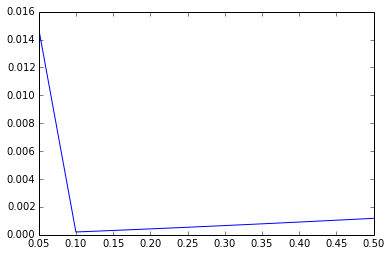

In [9]:
plt.plot(alphas, average_distance)